# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


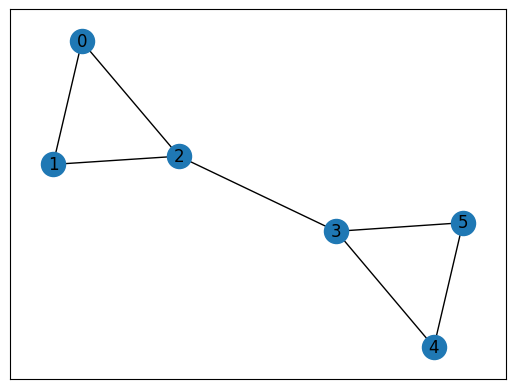

In [1]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

# G = nx.karate_club_graph()
# nx.draw_networkx(G)

In [2]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [3]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    # your code here
    for i in G.nodes:
        for j  in G.nodes:
            if G.nodes[i]['community'] == G.nodes[j]['community']:
                Aij = G.number_of_edges(i, j)
                Q += Aij - G.degree[i]*G.degree[j]/(2*m)
    return Q/(2*m)

In [4]:
compute_modularity(G)

0.3571428571428571

## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.

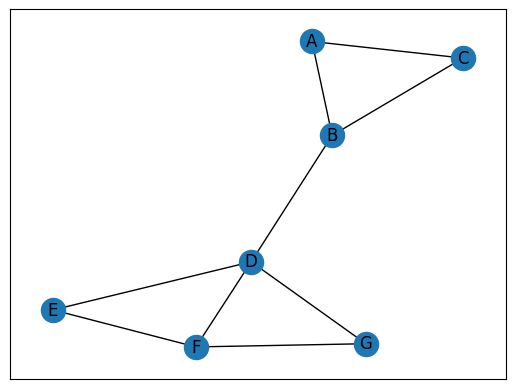

In [9]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'F'), ('F', 'G')]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw_networkx(G)

In [13]:
betweeness = nx.edge_betweenness_centrality(G, normalized=False)

k = [4,6]
graphs = []
for k in k:
    G_copy = G.copy()
    for edge in betweeness:
        if betweeness[edge] >= k:
            G_copy.remove_edge(*edge)
    graphs.append(G_copy)

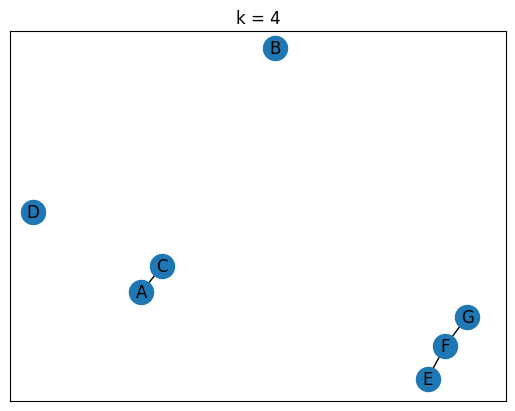

In [16]:
import matplotlib.pyplot as plt
nx.draw_networkx(graphs[0])
plt.title('k = 4')
plt.show()

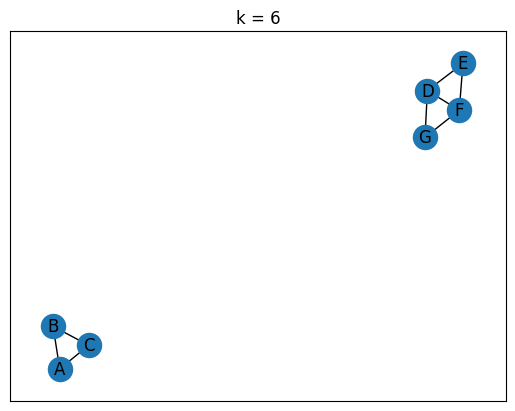

In [17]:
nx.draw_networkx(graphs[1])
plt.title('k = 6')
plt.show()